# Imports

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## Loading Dataset

In [277]:
dataset = pd.read_csv('./Iris.CSV')

In [278]:
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory data analysis

In [280]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Checking Outliers

In [282]:
columnsList = list(dataset.columns[1:-1])

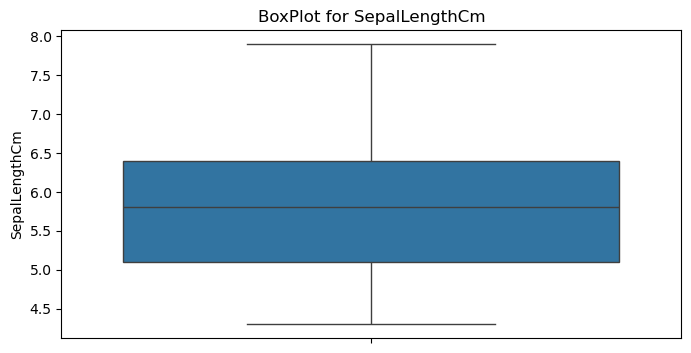

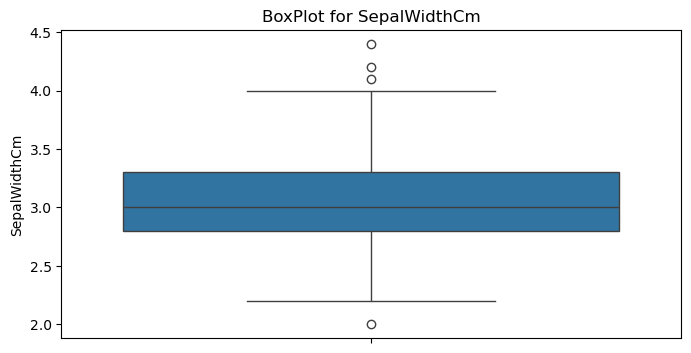

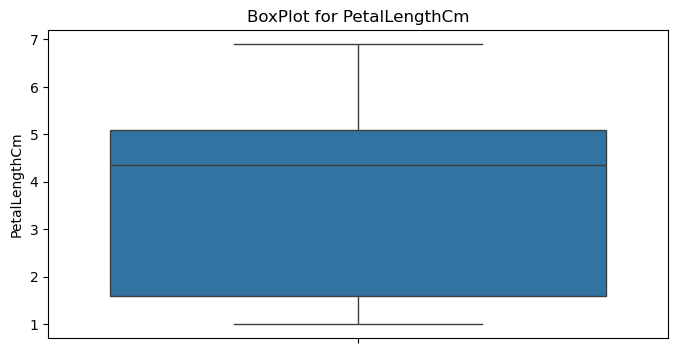

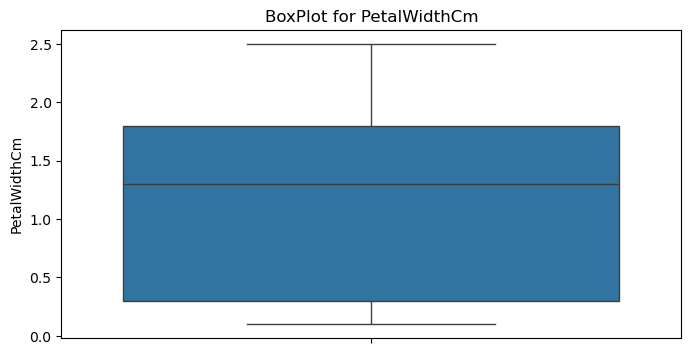

In [283]:
for col in columnsList:
    plt.figure(figsize=(8,4))
    sns.boxplot(dataset[col])
    plt.title(f'BoxPlot for {col}')
    plt.show()

## Remove ID column

In [285]:
dataset = dataset.drop(columns=['Id'])

## Train Test Split

In [287]:
X = dataset.drop(columns=['Species'])
Y = dataset['Species']

In [288]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

## Encoding

In [290]:
label_encoder = LabelEncoder()

In [291]:
dataset['Species'] = label_encoder.fit_transform(dataset['Species'])

In [292]:
dataset.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Feature Scaling

In [294]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Model

In [296]:
model = SVC(kernel='linear')
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [297]:
Y_pred = model.predict(X_test)

## Metrics

In [299]:
print('Accuracy', accuracy_score(Y_test, Y_pred))
print()
print('Confusion Matrix', confusion_matrix(Y_test, Y_pred))
print()
print('Classification Report', classification_report(Y_test, Y_pred))

Accuracy 0.9666666666666667

Confusion Matrix [[ 8  0  0]
 [ 0 11  0]
 [ 0  1 10]]

Classification Report                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



## HyperParameter Tuning 

In [301]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Initialize GridSearchCV with SVC and parameter grid
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, Y_train)

# Best
print("Best Parameters:", grid.best_params_)

# best model
best_svm_model = grid.best_estimator_

y_pred = best_svm_model.predict(X_test)

print("Optimized Model Accuracy:", accuracy_score(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, 